# SVCs - Classification Model  


In [196]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [197]:
iris = load_iris()

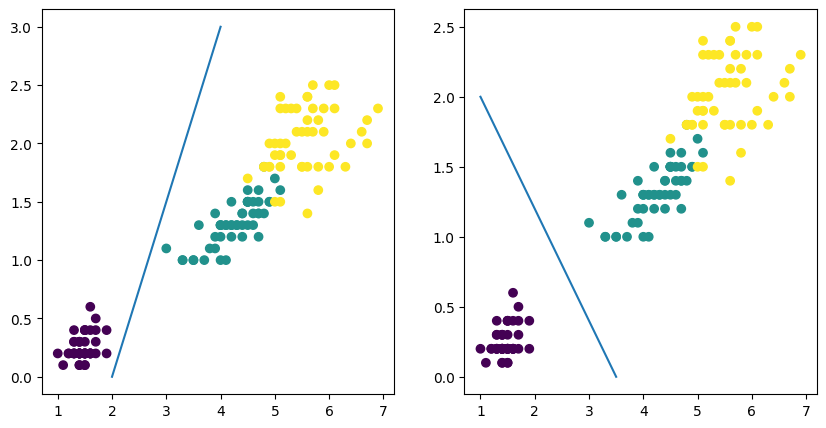

In [198]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(iris.data[:,2], iris.data[:,3], c=iris.target)
ax[0].plot([2,4], [0,3]) # little to no margin between data (bad)

ax[1].scatter(iris.data[:,2], iris.data[:,3], c=iris.target)
ax[1].plot([3.5,1],[0,2]) # more margin between closest points


What line is best to separate the data? There are a lot of options, but not all options are good. We want the line that optimizes the *space between* each dataset and produces fewer misclassifications.

# Support Vector Machine  
Margin: the distance from the closest datapoint to the separator.  Goal is the MAXIMIZE the MARGIN.  
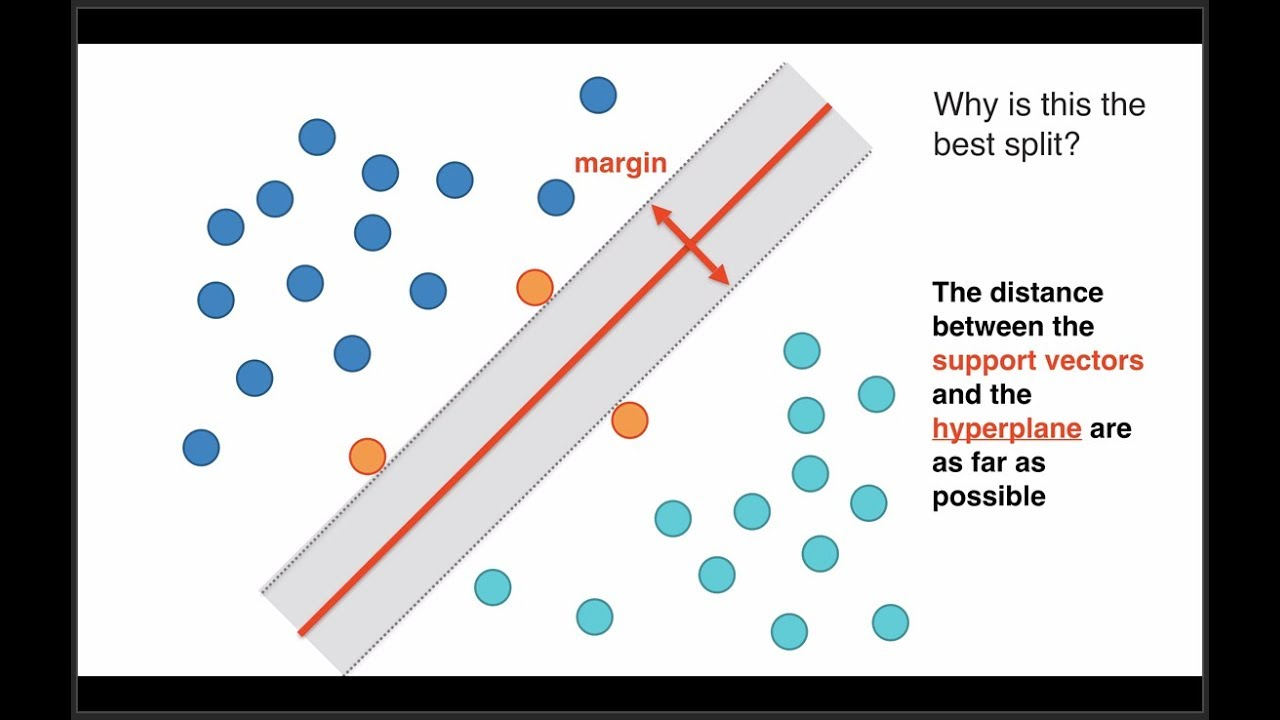


**Problems with SVCs**

- Doesn't work clearly with overlapping classes (like green and yellow above)   
- Only works with linearly seperable data ( Only Lines )
- Sensitive to outliers  

**Fixes**   
- Bias(bias towards individual points and outliers)/Variance(how spread out model is) tradeoff
    - If we force all points to be correct, we have LOW Bias. However, overfits the data so our predictions will be incorrect, giving a HIGH Variance  
    - Fix: Allow misslassifications will increase bias, but decrease variance, giving more correct predictions for model. 

- margin is a "soft margin" if we allow misclassifications


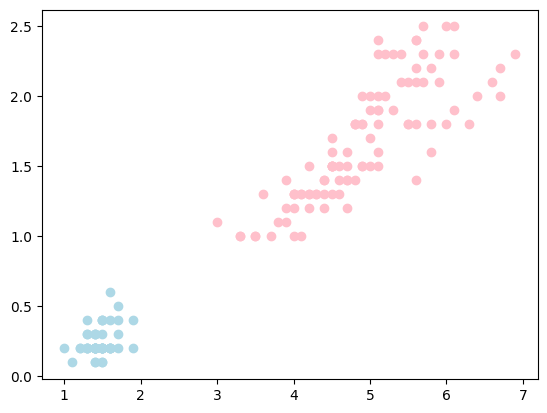

In [199]:
plt.scatter(iris['data'][:50,2], iris['data'][:50, 3], c='lightblue')
plt.scatter(iris['data'][50:,2], iris['data'][50:, 3], c='pink')


# Preprocesssing  
1. Missing data
2. Encode categorical varialbes (it's already 0, 1, 2)
3. Split data (skip for today)
4. Feature scaling (Standardize)

In [200]:
def standardize(x):
    return (x - np.mean(x) / np.std(x)) # centered around the mean, and spread out based on standard deviation

In [201]:
petal_length = standardize(iris['data'][:, 2])
petal_width = standardize(iris['data'][:, 3])

# SVC Model 
Support vector classifier

In [202]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC  

In [203]:
svc_model = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=0.001, loss='hinge'))
])
    # C: Regularazation parameter = High c means Strong regularazation which means 
         # high c: fewer misclassifications & smaller margins
    
    # loss: which loss function to use to improve the model (0 or no penalty after a certain point)
svc_model.fit(iris['data'][:,2:], iris['target'])
y_pred = svc_model.predict(iris['data'][:,2:])

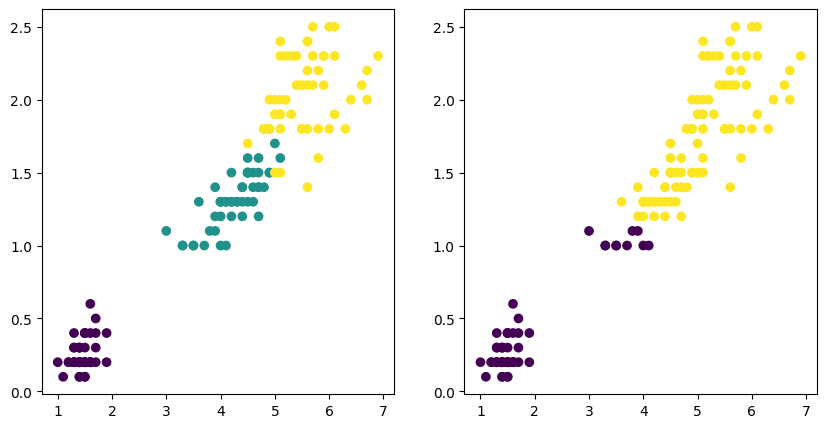

In [204]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(iris.data[:,2], iris.data[:,3], c=iris.target)

ax[1].scatter(iris.data[:,2], iris.data[:,3], c=y_pred)


ValueError: 'c' argument has 50 elements, which is inconsistent with 'x' and 'y' with size 150.

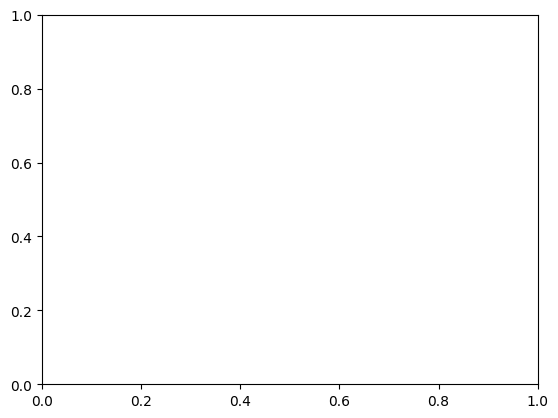

In [205]:
# from last time... 
X_test, Y_test = np.meshgrid(np.linspace(1, 7, 100), np.linspace(0,2.5,100))
X_test = np.array([X_test.flatten(), Y_test.flatten()]).T

y_pred = svc_model.predict(X_test)

plt.scatter(iris['data'][:,2], iris['data'][:,3], c=iris['data'][:50,2])
plt.xlabel(iris['feature_names'][2])
plt.ylabel(iris['feature_names'][3])
plt.scatter(X_test[:,0], X_test[:,1], c=y_pred, alpha=0.8, marker='.', s=1)
plt.show()

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_test = svc_model.predict(iris['data'][:,2:])

print(classification_report(iris['target'], y_test))
print(confusion_matrix(iris['target'], y_test))


              precision    recall  f1-score   support

           0       0.83      1.00      0.91        50
           1       0.00      0.00      0.00        50
           2       0.56      1.00      0.71        50

    accuracy                           0.67       150
   macro avg       0.46      0.67      0.54       150
weighted avg       0.46      0.67      0.54       150

[[50  0  0]
 [10  0 40]
 [ 0  0 50]]


C:\Users\shust\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shust\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shust\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati